# <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center">Acea Smart Water Analytics 💦</p>

<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center">Predicting Water Availability </p>

In [1]:
#Linear algebra and Data Processing
import numpy as np
import pandas as pd

#Time Series conversion
import datetime as dt

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('RdBu')

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

#model performance
from sklearn.metrics import mean_squared_error, r2_score

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">1. Problem Introduction </p>

A water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter water bodies are refilled, but during spring and summer they start to drain. To help preserve the health of these water bodies, it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

Acea group is one the leading Italian multiutility operators, listed on Italian Stock Exchange since 1999. The company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in various regions

The Acea Group provides data for 4 types of water bodies, namely, 

* Water Spring

* Lake

* River

* Aquifer

While the primary intention is the same i.e., to predict water availability, the reality is that each waterbody has such unique characteristics that their attributes are not linked to each other.

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">2. Springs - Amiata Spring 🌊</p>

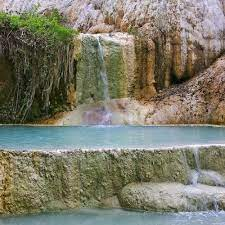

A spring is a point of exit at which groundwater from an aquifer flows out on top of Earth's crust (pedosphere) and becomes surface water. Springs are driven out onto the surface by various natural forces, such as gravity and hydrostatic pressure. They vary in volumetric flow rate from nearly zero to more than 14,000 litres per second for the biggest springs.

Information about the Amiata aquifer. This aquifer is accessed through the Ermicciolo, Arbure, Bugnano and Galleria Alta springs. The levels and volumes of the four springs are influenced by the parameters: ```pluviometry```, ```sub-gradation```, ```hydrometry```, ```temperatures``` and ```drainage volumes```.

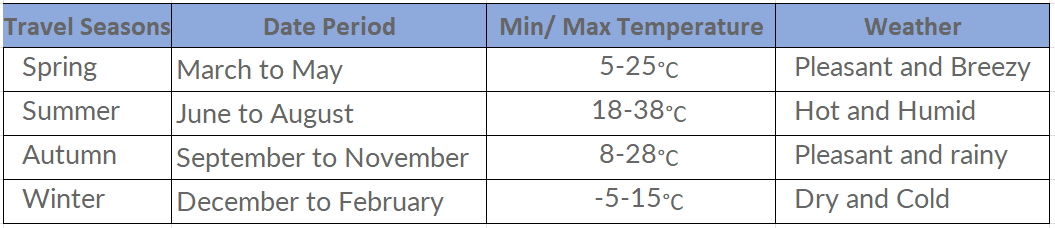

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">3. Exploratory Data Analysis 🔎</p>

In [2]:
#Importing the Dataset
df = pd.read_csv(r'Water_Spring_Amiata.csv')
df.head()

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN


---
Features:
* **Rainfall** indicates the quantity of rain falling (mm)
* **Temperature** indicates the temperature (°C)
* **Depth to Groundwater** indicates the groundwater level (m from the ground floor)

Target:
* **Flowrate** indicates the speed of flow of water (Litres per second)
---

In [3]:
#Checking the dataset shape
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1])

Number of rows is =  7487  
Number of columns is =  16


In [4]:
#Summarized information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   7487 non-null   object 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64
 3   Rainfall_S_Fiora                       2633 non-null   float64
 4   Rainfall_Laghetto_Verde                2865 non-null   float64
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64
 10  Temperature_S_Fiora                    7487 non-null   float64
 11  Temp

---

 - All features are of expected data type, except the _Date Column_ which will need be converted to ```datetime``` for efficient analysis.

 - Majority of the columns have more than 50% of NULL values

---

In [5]:
#Checking the start and end date
print('Starting date is :' , df.index[0],
      '\nEnding Date is : ',df.index[-1])

Starting date is : 0 
Ending Date is :  7486


---

The observations recorded in this dataset spans the period between January 2000 and June 2020. 

---

<AxesSubplot:>

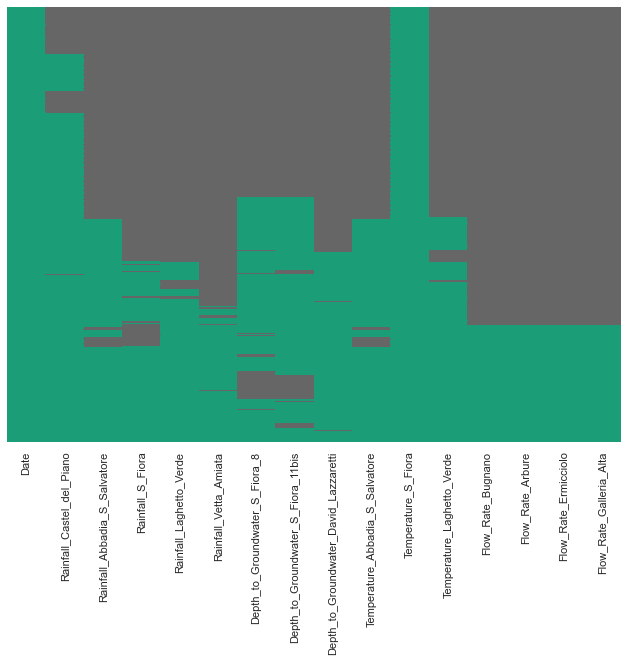

In [6]:
#An overview of missing values per feature

sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Dark2")

---

Missing values mapped as gray in the image above.

Huge missingness observed in the dataset. More than 60% missingness for more than 10 out of the 16 features.

---

In [7]:
#Quantifying the missing values
pd.Series(df.isnull().sum()/len(df)).rename_axis('features/target')\
.to_frame('Missing Value Percentage').sort_values('Missing Value Percentage', ascending=False)

,Missing Value Percentage
features/target,
Flow_Rate_Bugnano,0.731802
Flow_Rate_Arbure,0.731802
Flow_Rate_Ermicciolo,0.731802
Flow_Rate_Galleria_Alta,0.731802
Rainfall_Vetta_Amiata,0.704555
Rainfall_S_Fiora,0.648324
Rainfall_Laghetto_Verde,0.617337
Depth_to_Groundwater_David_Lazzaretti,0.566983
Depth_to_Groundwater_S_Fiora_8,0.523307


---
 - The largest missingness is found in the _Flowrate columns_ which happen to be the output features.
 - This will be a major consideration in determining the threshold for dropping NULL values.
---

In [8]:
#Descriptive Statistics of columns/features
df.describe()

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
count,6291.000000,3586.000000,2633.000000,2865.000000,2212.000000,3569.000000,3594.00000,3242.000000,3583.000000,7487.000000,3604.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2.624034,3.784830,4.095784,4.332845,2.866456,-38.118649,-51.64424,-302.697412,12.159503,11.248898,10.788166,-0.259413,-2.009348,-4.507117,-20.972385
std,7.997019,11.358671,11.861017,12.143496,7.471131,1.239967,0.93864,7.641590,7.085829,6.818232,6.711271,0.130209,1.062751,1.465277,2.034663
min,0.000000,0.000000,0.000000,0.000000,0.000000,-40.790000,-53.64000,-314.710000,-8.450000,-8.950000,-8.550000,-0.385529,-3.042149,-6.469258,-26.089554
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-39.240000,-52.44000,-309.435000,6.700000,5.950000,5.400000,-0.348533,-2.785148,-5.422521,-22.485956
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-38.120000,-51.65000,-303.365000,11.750000,11.050000,10.450000,-0.319199,-2.491041,-4.862256,-20.718974
75%,0.600000,1.400000,1.800000,1.800000,1.400000,-36.930000,-50.76000,-295.332500,17.650000,16.750000,15.950000,-0.219417,-1.695151,-3.872881,-19.241000
max,149.600000,228.500000,220.000000,165.200000,79.200000,-36.380000,-50.24000,-290.580000,30.150000,28.200000,28.000000,0.000000,0.000000,0.000000,-17.098023


---
 - The description above emphasizes the seasonality of the dataset, as Rainfall values begin to read on the 75th percentile, shows proves the fact that rainy season in the country takes 25% of the year period.
---

In [4]:
#Converting the date column to datetime time
#to allow for efficient analysis
df.Date = pd.to_datetime(df.Date)

# get a year from corresponding Date column value
df['year'] = df['Date'].dt.year
 
# get a month from corresponding Date column value
df['month'] = df['Date'].dt.month

#Review the shape of the adjusted dataframe
display(df.shape)

#Resetting the index and viewing the top 5 rows
df.set_index('Date', inplace = True)
df.head()

(7487, 18)

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta,year,month
Date,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN,2000,1
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN,2000,2
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN,2000,3
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,2000,4
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN,2000,5


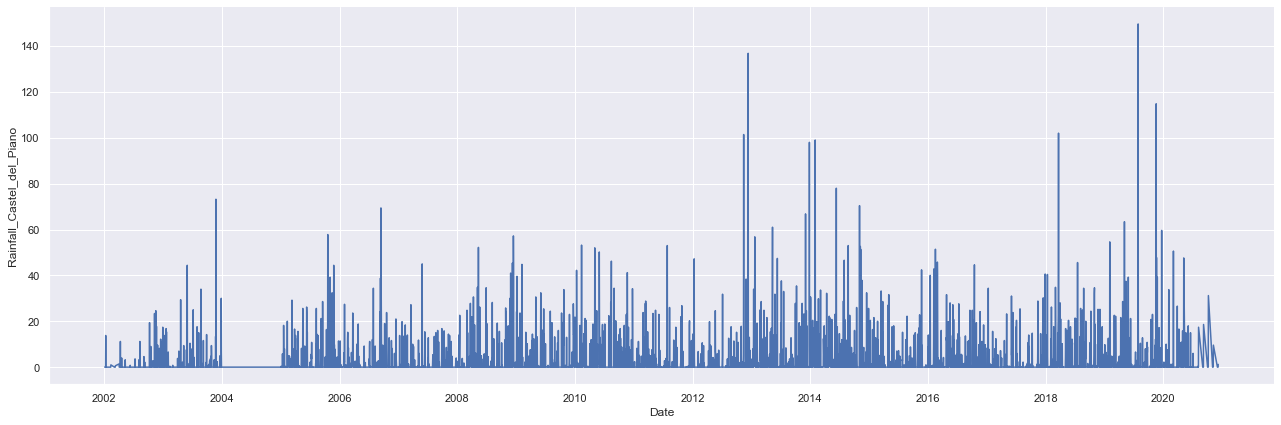

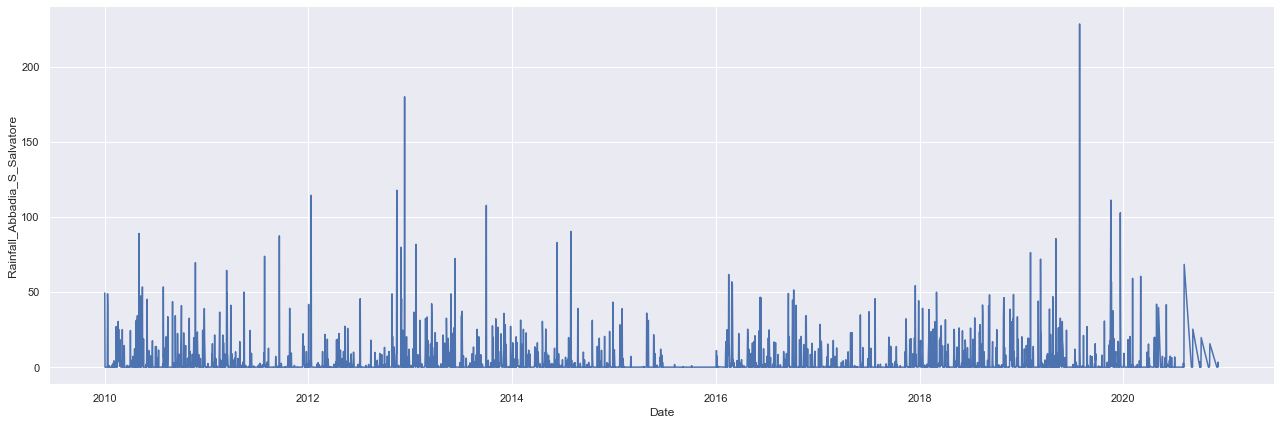

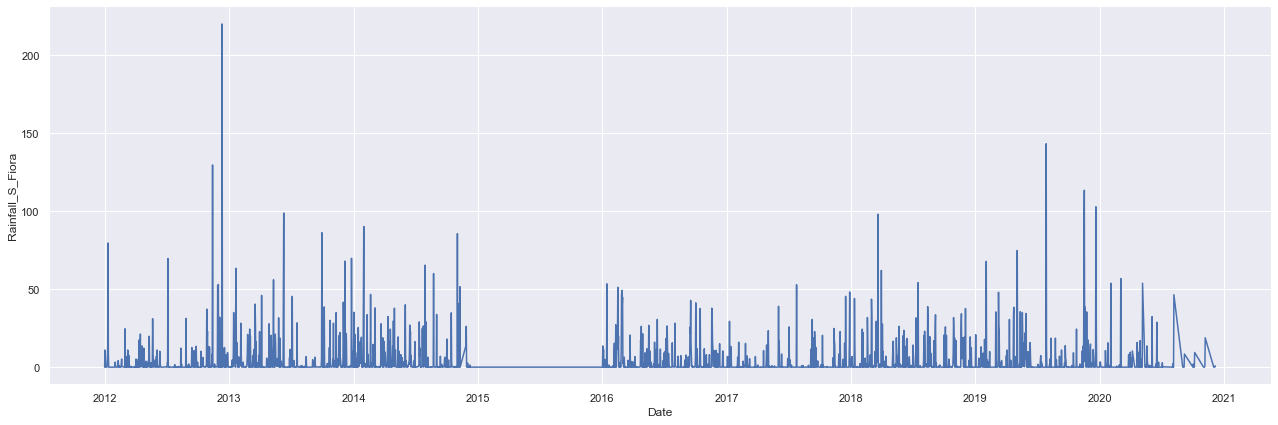

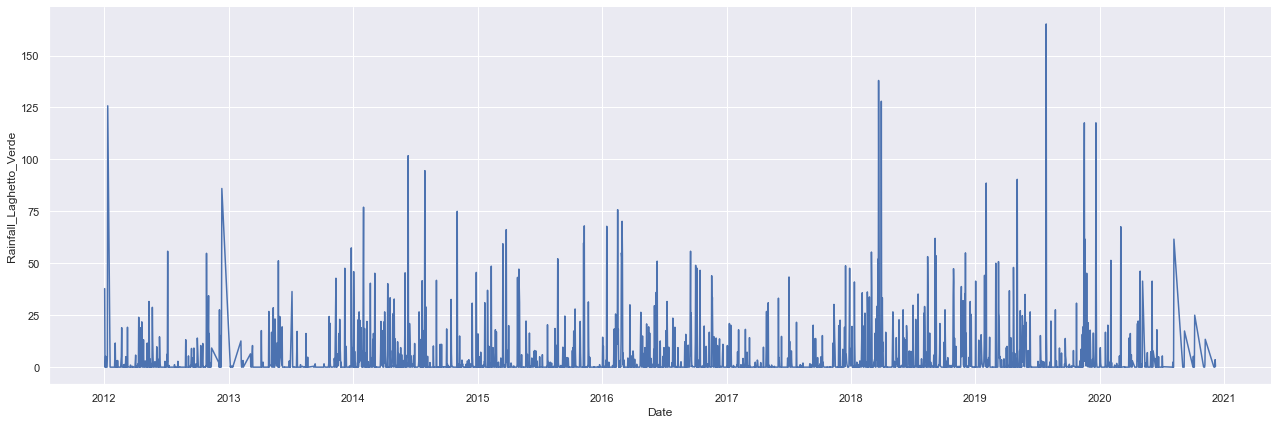

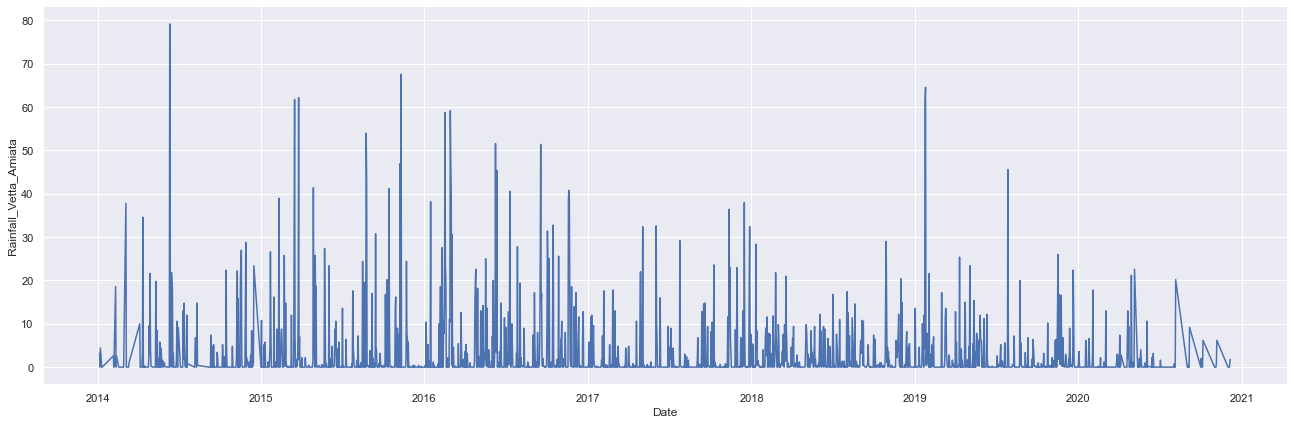

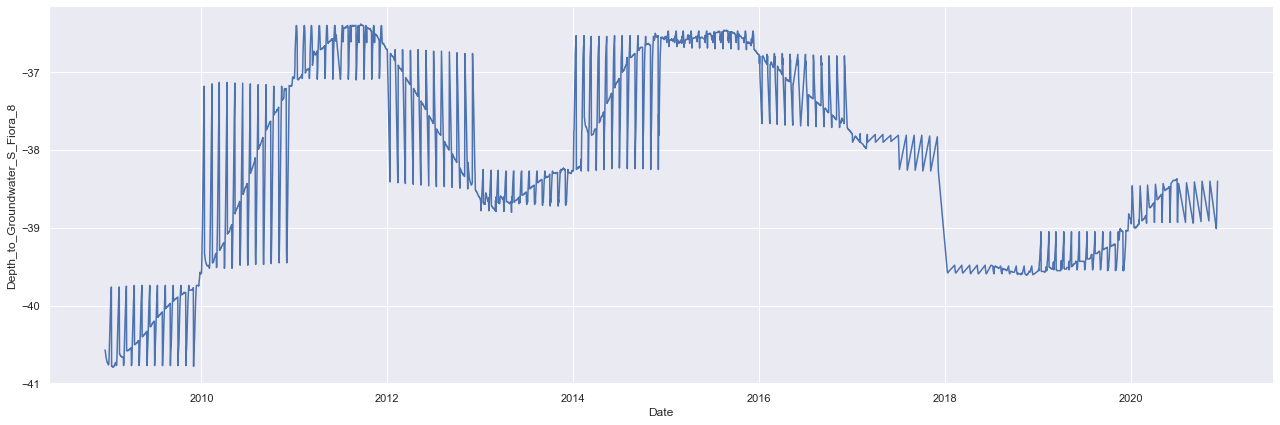

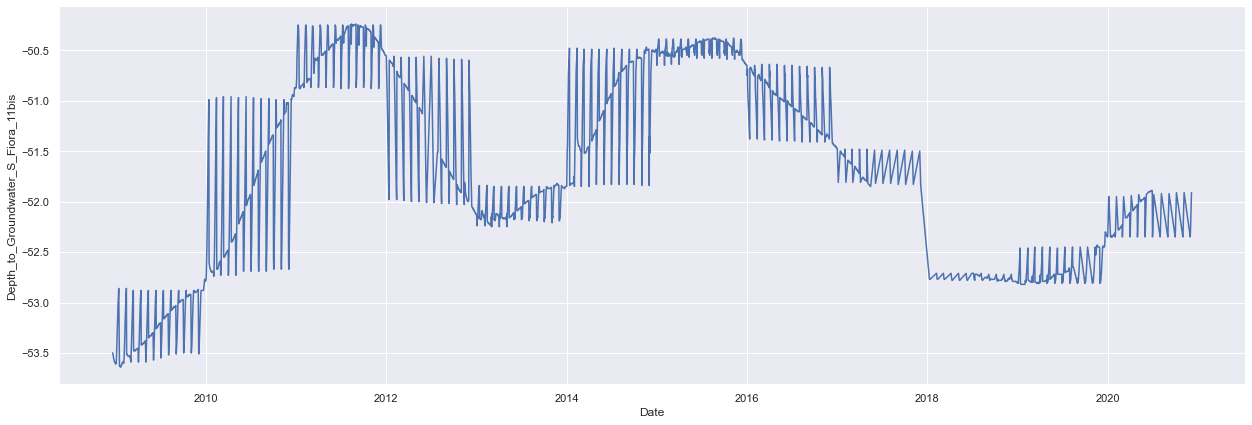

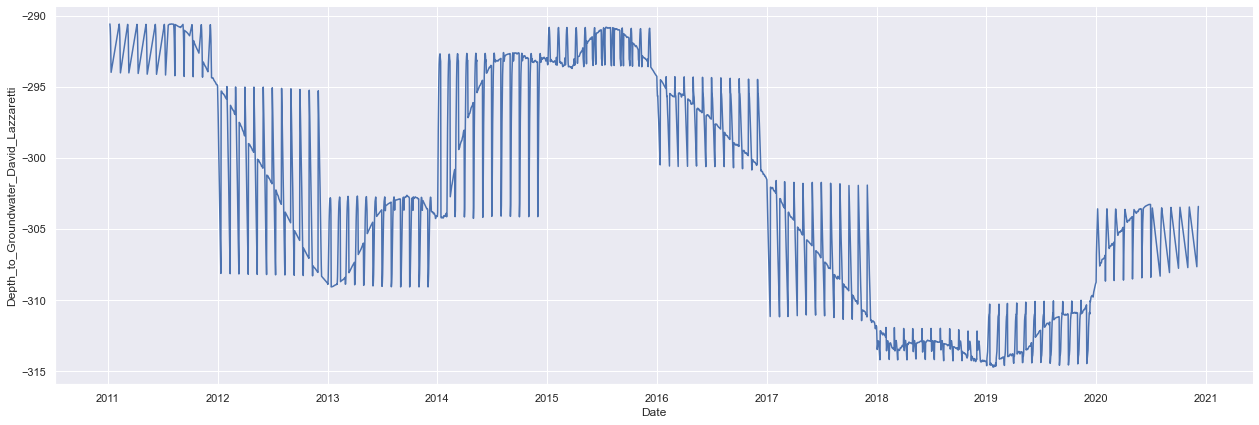

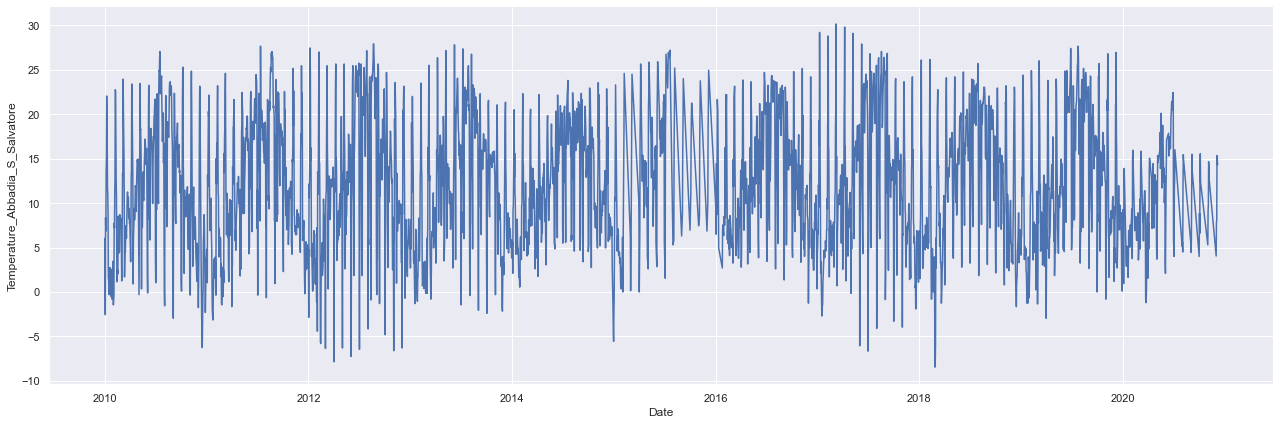

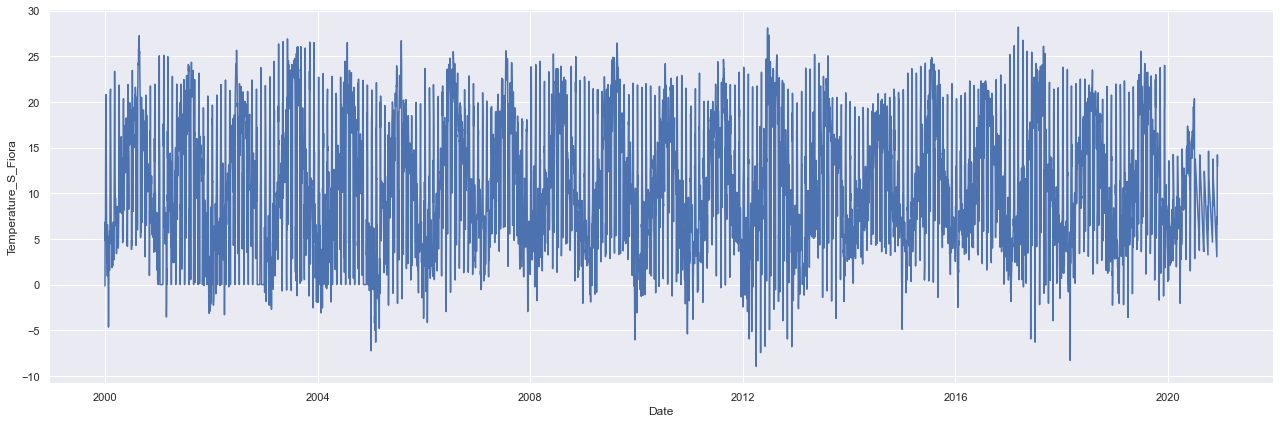

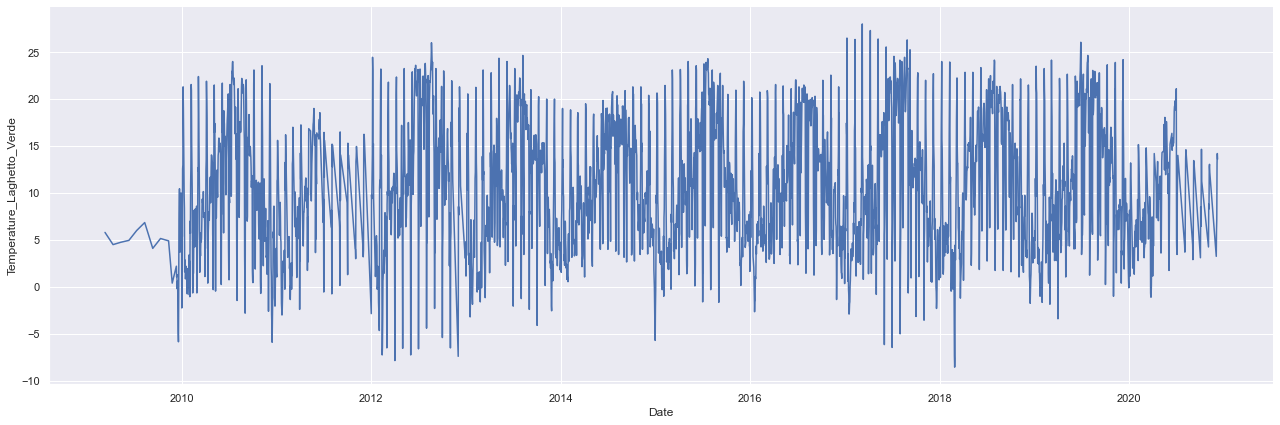

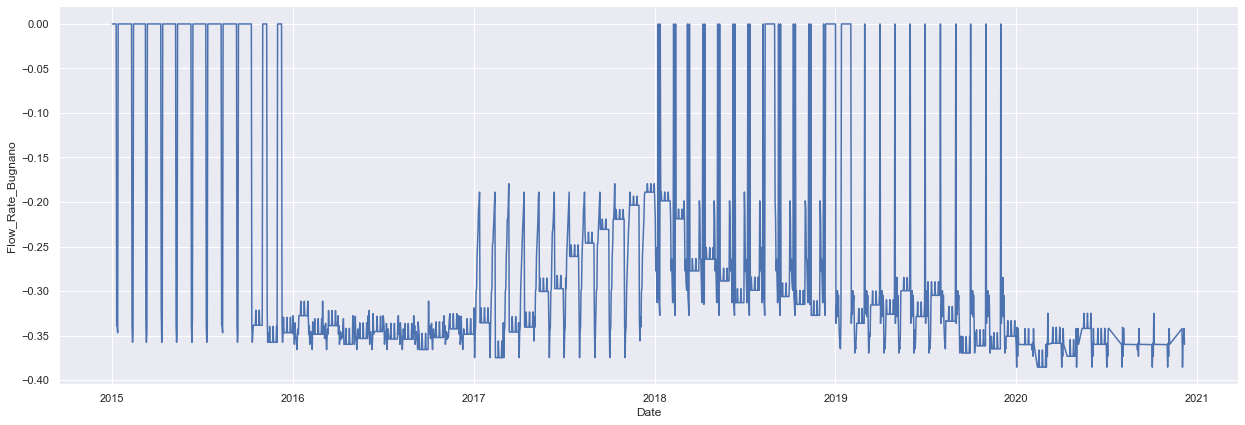

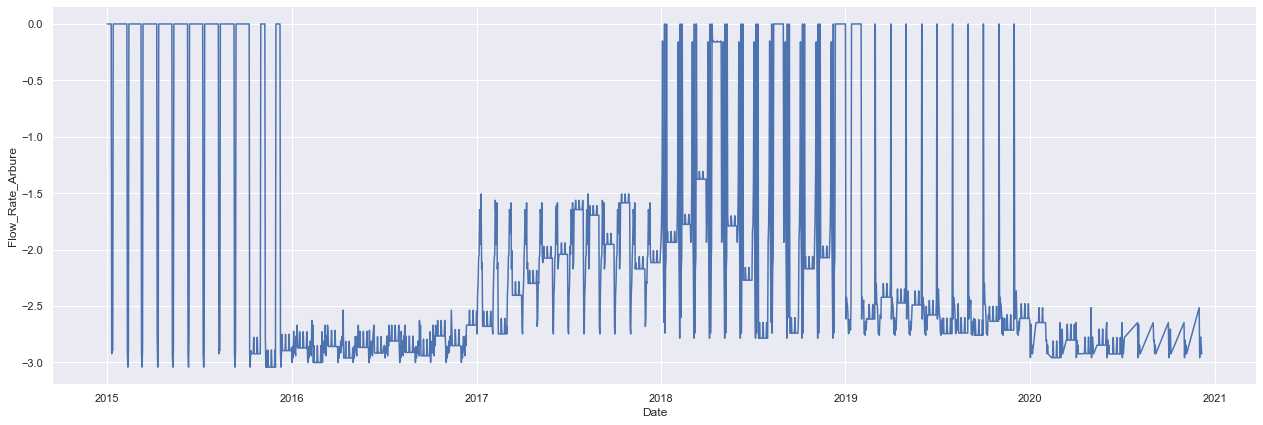

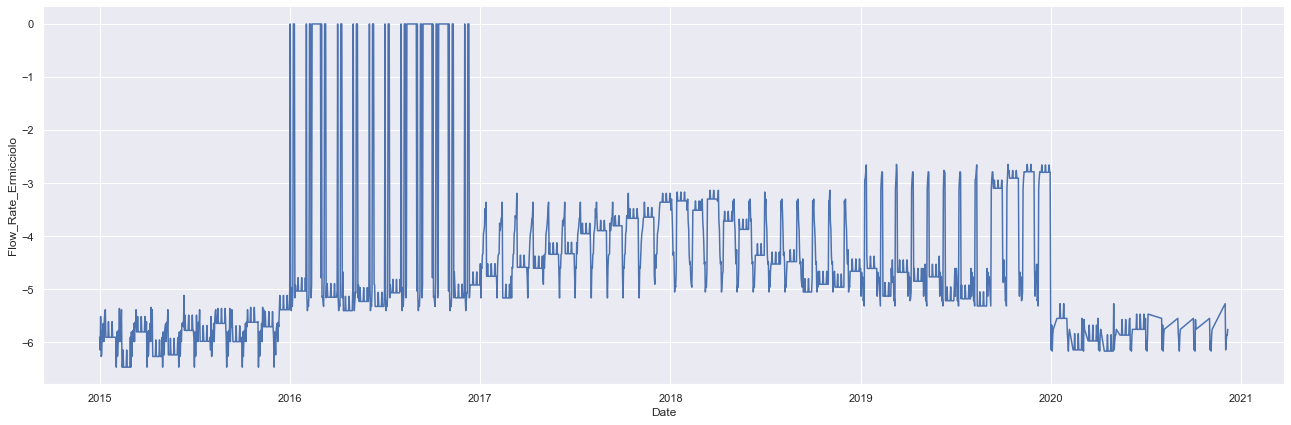

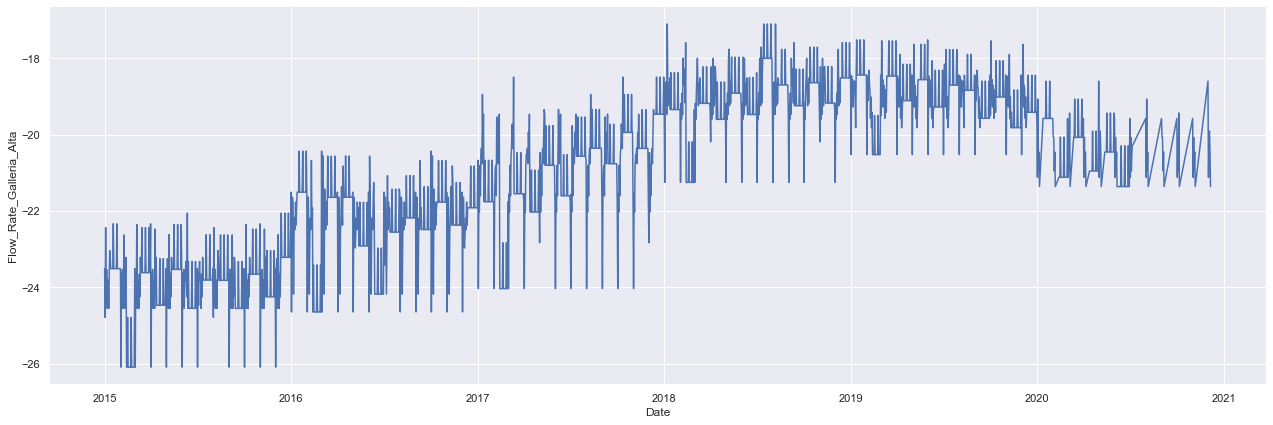

In [10]:
cols = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
for i in cols:
    df = df.asfreq('D')
    g = sns.relplot(data = df, x = df.index, y = df[str(i)], kind = 'line')
    g.fig.set_figwidth(20)
    g.fig.set_figheight(6)
    plt.show()

---
The _Relplot_ above shows the relationship between the time variable and the other variables of the dataset.

 - The temperature values seem to be more predicatble with regular patterns, as expected based on seasons highlighted earlier.
 - Rainfall values are somewhat scarce, and the patterns are lesslikely predictable.
 - The patterns displayed by the ```Depth to Ground water``` and ```Flowrate``` values are similar and portend that various factors mighr be responsible for their behavior.


In [11]:
columns = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
#Define a dataframe: group by year
df_year = df.groupby(['year'])[columns].count()#.reset_index()
df_year

,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
year,,,,,,,,,,,,,,,
2000.0,0,0,0,0,0,0,0,0,0,366,0,0,0,0,0
2001.0,0,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2002.0,272,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2003.0,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2004.0,0,0,0,0,0,0,0,0,0,366,0,0,0,0,0
2005.0,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2006.0,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2007.0,365,0,0,0,0,0,0,0,0,365,0,0,0,0,0
2008.0,364,0,0,0,0,14,14,0,0,366,0,0,0,0,0



 - The dataframe groupings allows visibility on the distribution of data collected over the months, as above, and over the years.
 
 - The _Flowrate_ features have a large percentage of rows that are NULL. This will become a major consideration when determinig a threshold to drop rows.
---

---
Having observed that more of the non-zero ```Rainfall``` feature values begin from year 2012, we will slice the dataset and zoom into these years with the Relplot again to have a view of the rainfall patterns across the cities/acqueduct areas.

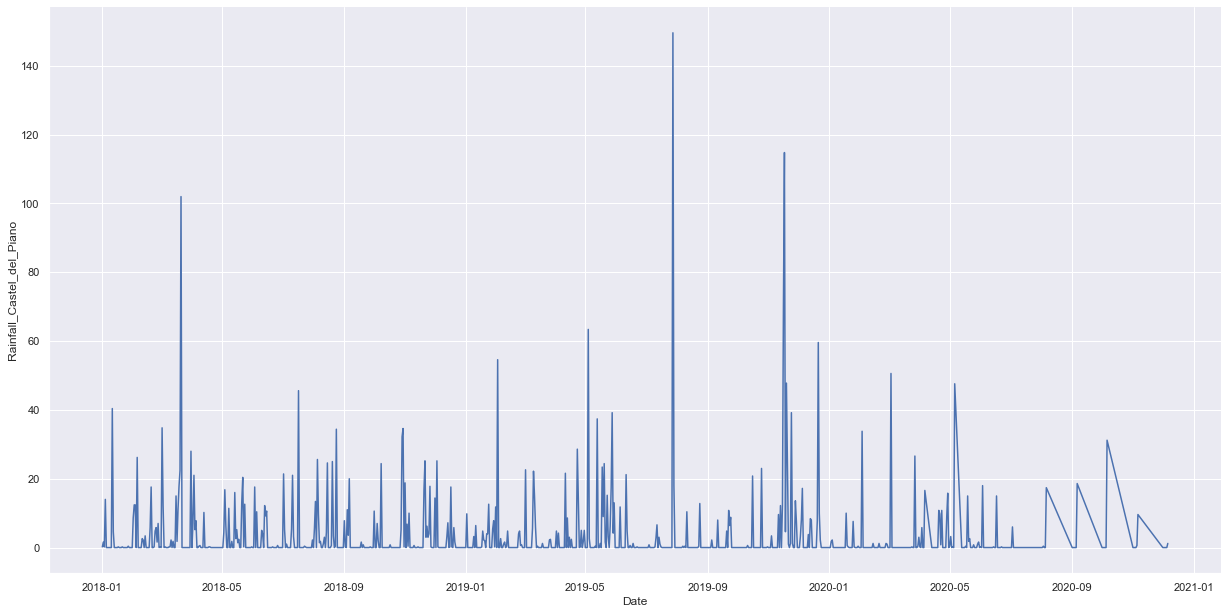

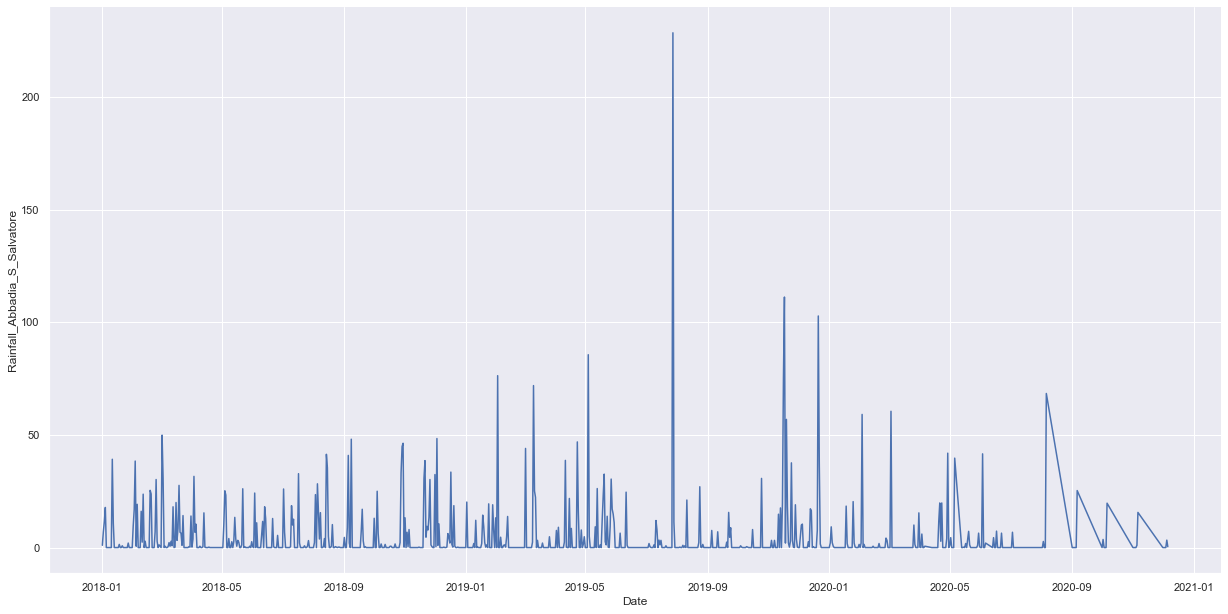

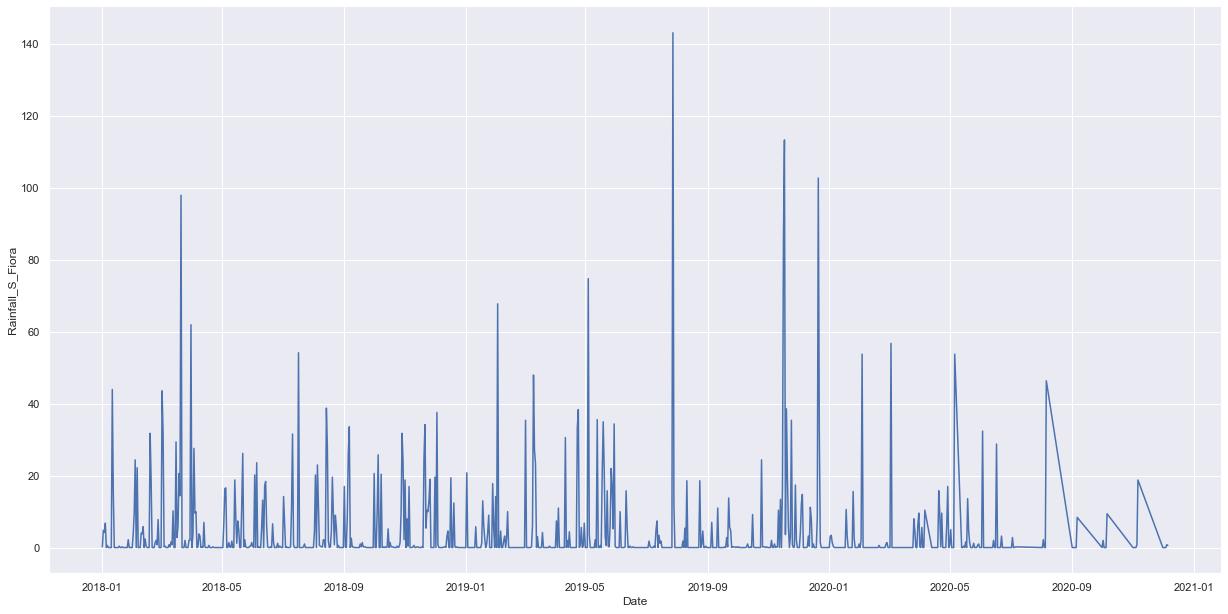

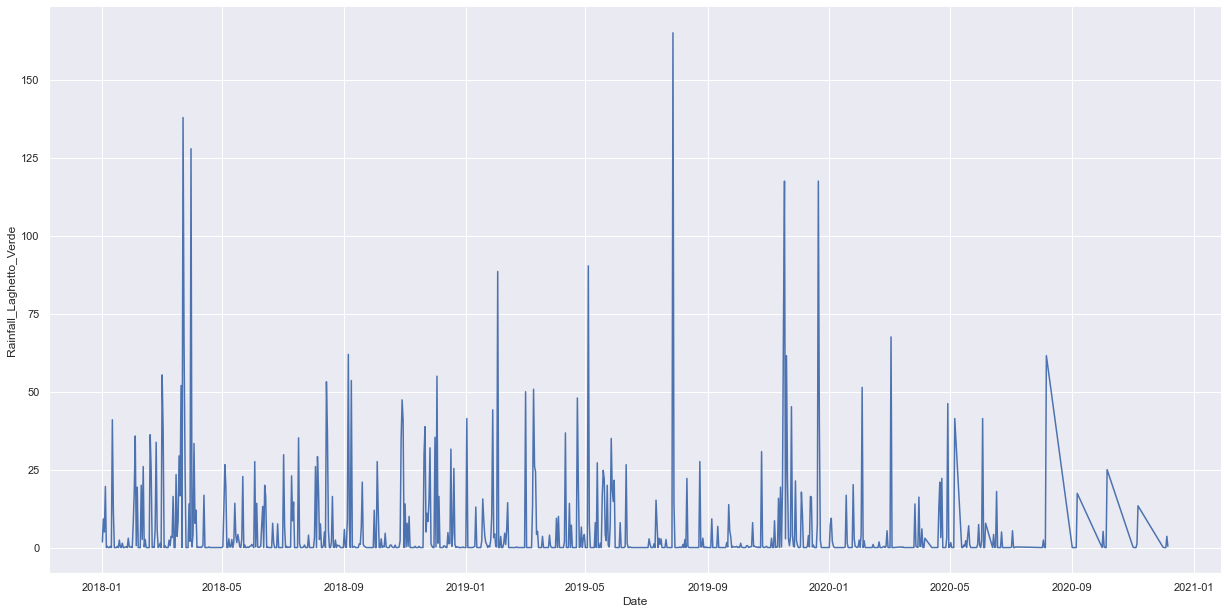

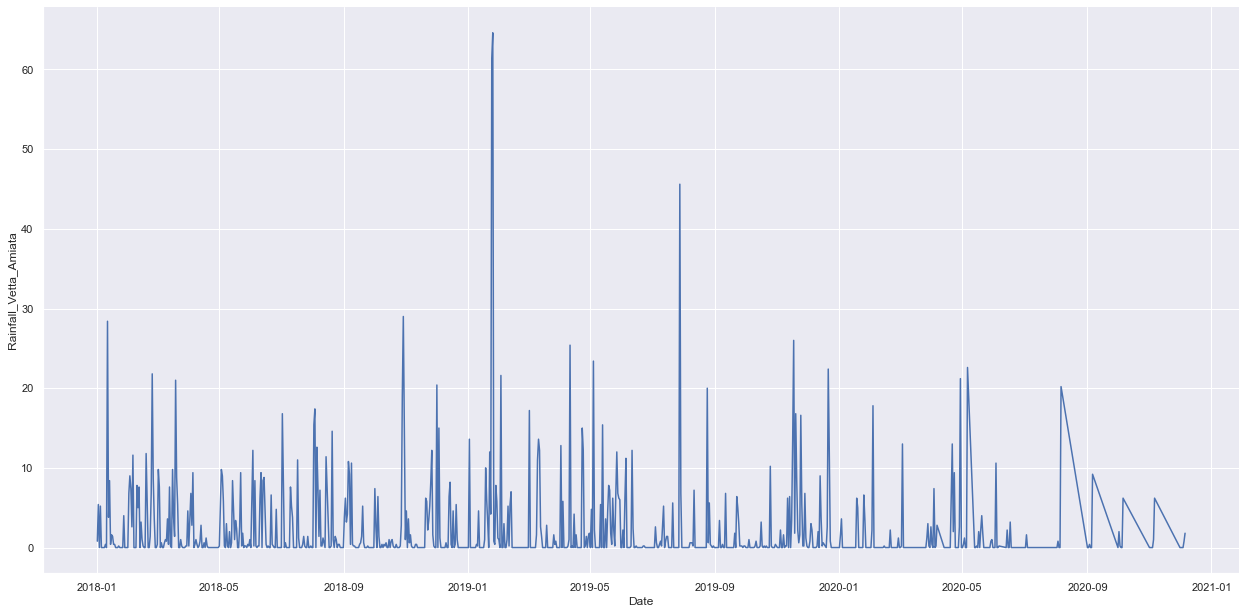

In [12]:
#Listing the rainfall columns to filter
#a dataframe of rainfall features above year 2015
rainfall = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata']

df_rain = df[df['year']>=2018][rainfall]

#Create an iteration through the days for rainfall plots with frequency in DAYS
for i in rainfall:
    df_rain = df_rain.asfreq('D')
    g = sns.relplot(data = df_rain, x = df_rain.index, y = df_rain[str(i)], kind = 'line')
    g.fig.set_figwidth(20)
    g.fig.set_figheight(9)
    plt.show()

It is important to see that the rainfall patterns across the cities around the different acqueducts are similar.

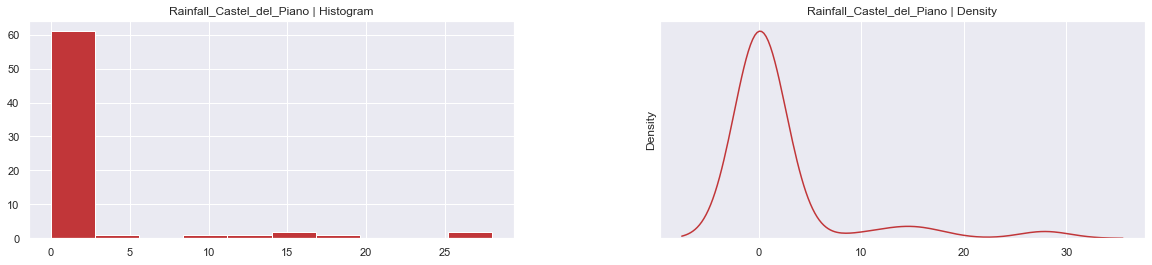

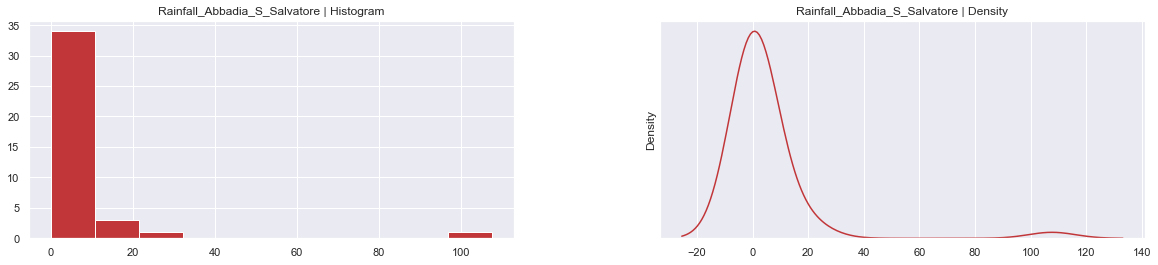

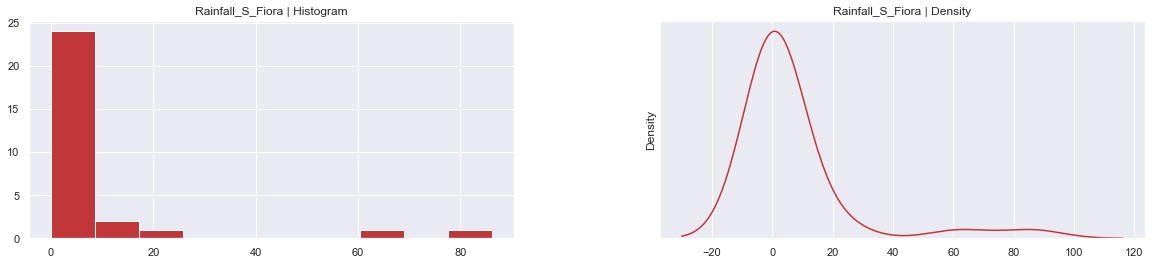

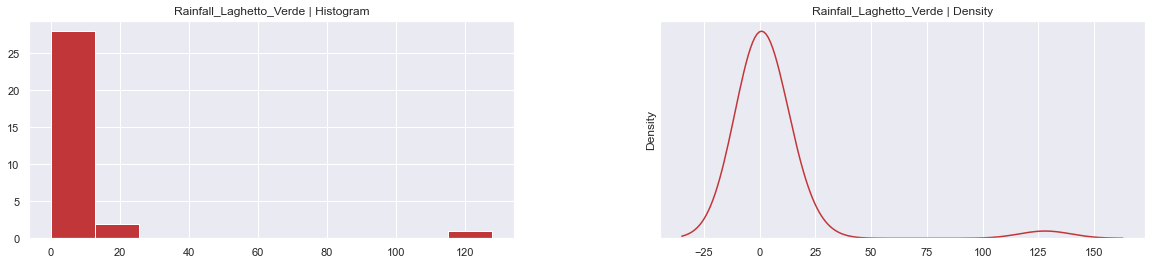

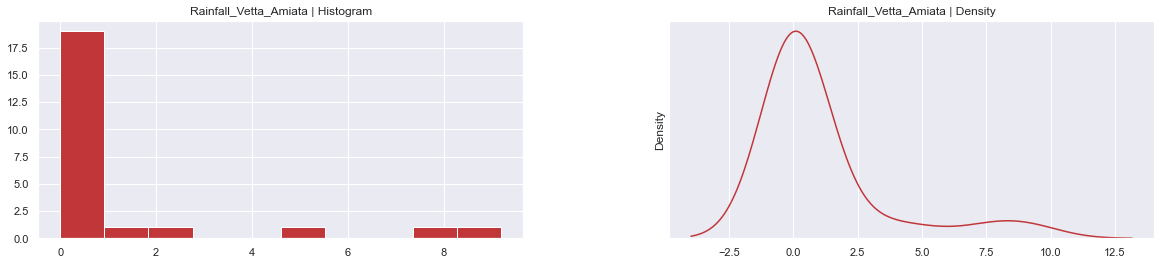

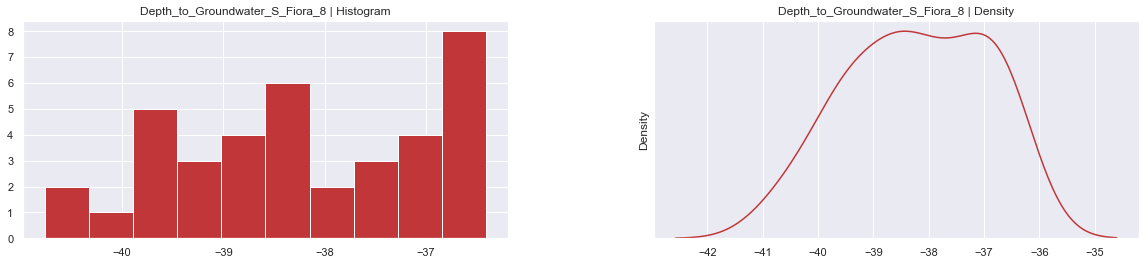

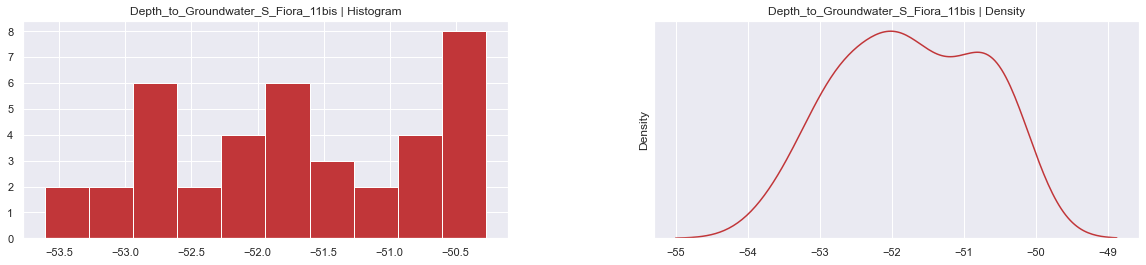

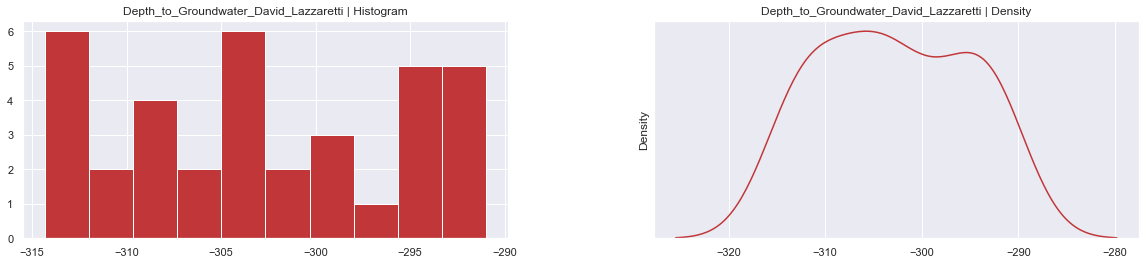

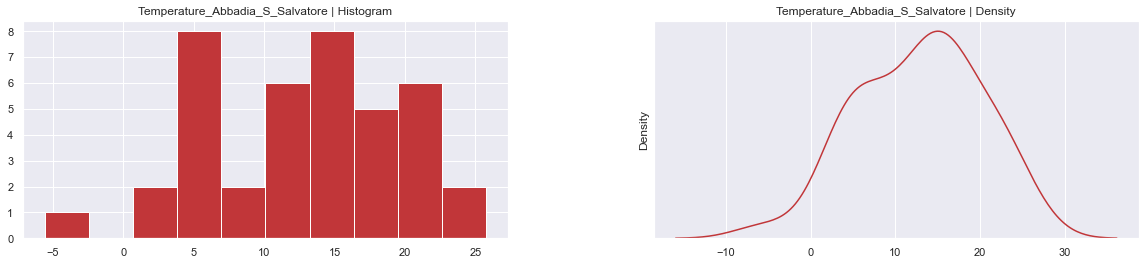

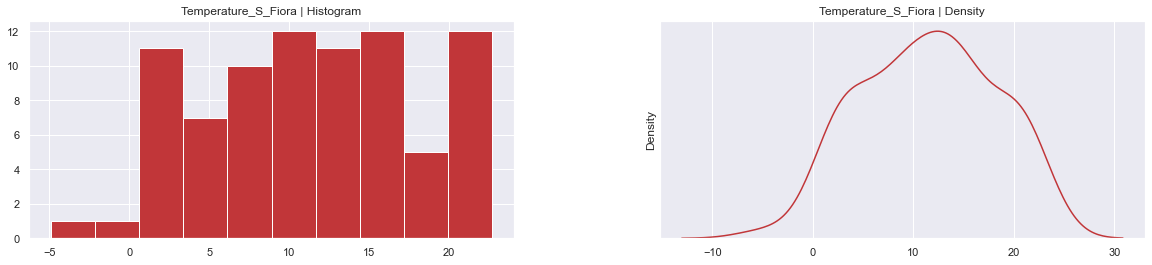

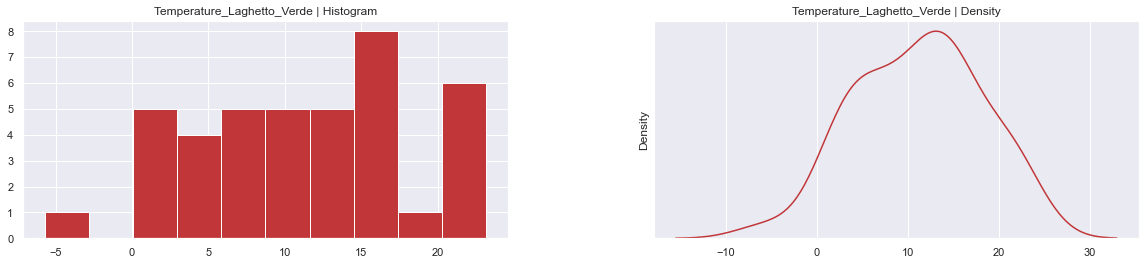

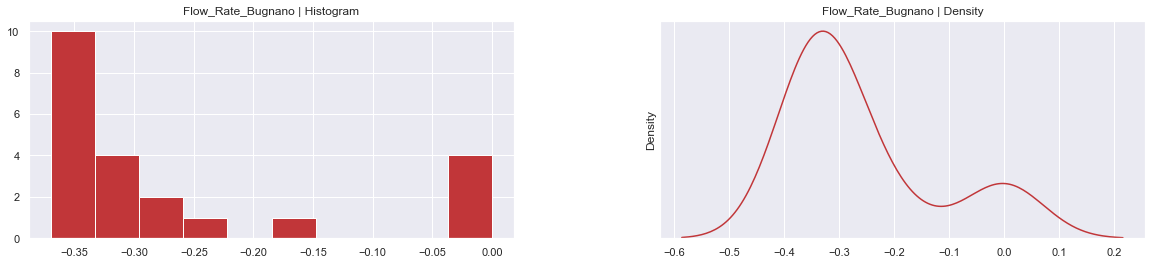

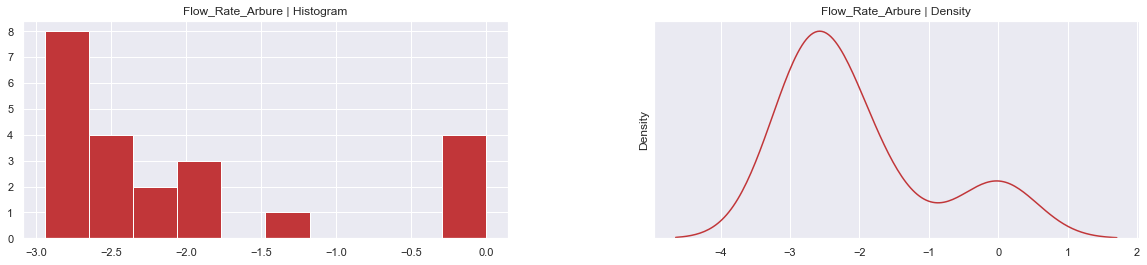

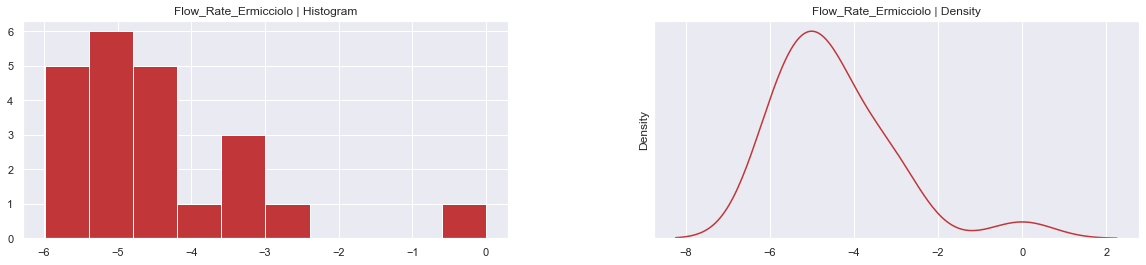

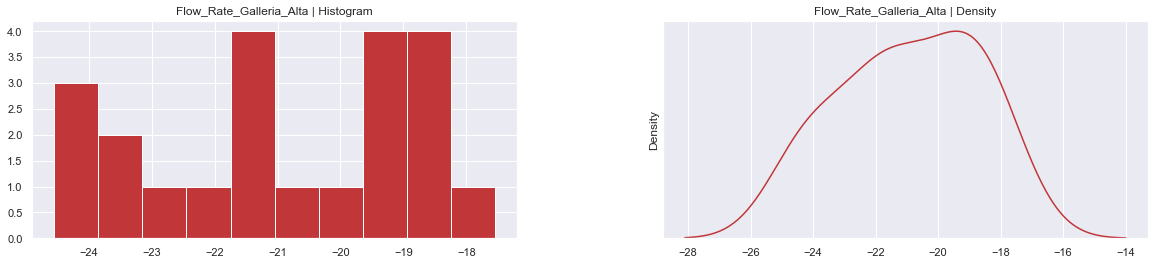

In [81]:
for i in cols:
    fig, axes = plt.subplots(1, 2, figsize = (20, 4))
    df.hist(str(i), bins = 10, ax=axes[0])
    try: 
        sns.kdeplot(np.array(df[str(i)]))
    except: ValueError
        
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Density")
    plt.show()

---
All the features produce a fair normal distribution of values except for the _Rainfall_ features with huge skews to the right, and extreme high values.

There were more days without rainfall, than there were with rainfall.

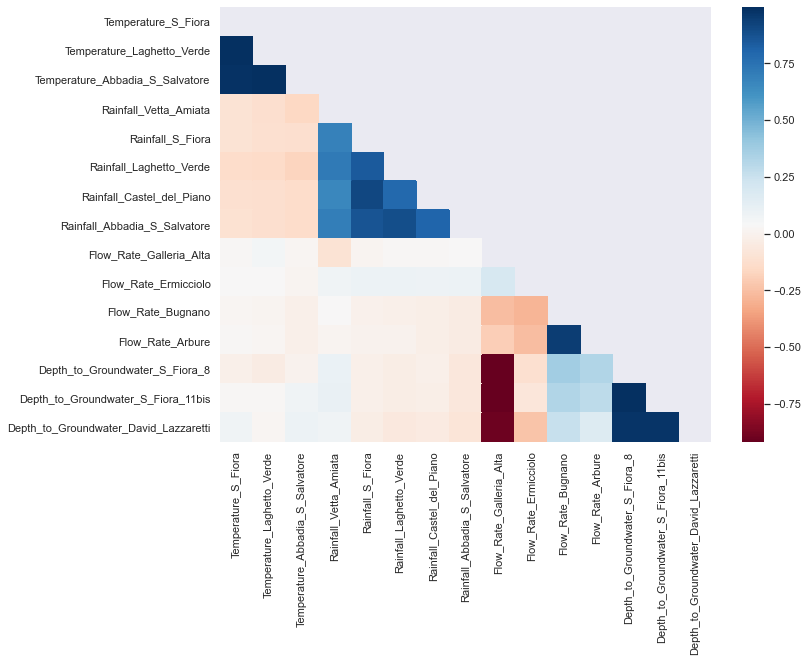

In [13]:
cols = ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
cols.sort(reverse=True)

# creating mask
mask = np.triu(np.ones_like(df[cols].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[cols].corr(), cmap="RdBu", annot=False, mask=mask)
 
# displaying heatmap
#plt.show()

Slight collinearity observed between the ```Temperature_Laghetto_Verde``` and ```Temperature_S_Fiora``` features.

Also, ```Flow_Rate_Galleria_Alta``` strongly correlates with the ```Depth_to_Groundwater*``` features. Feature selection by correlation will be considered.

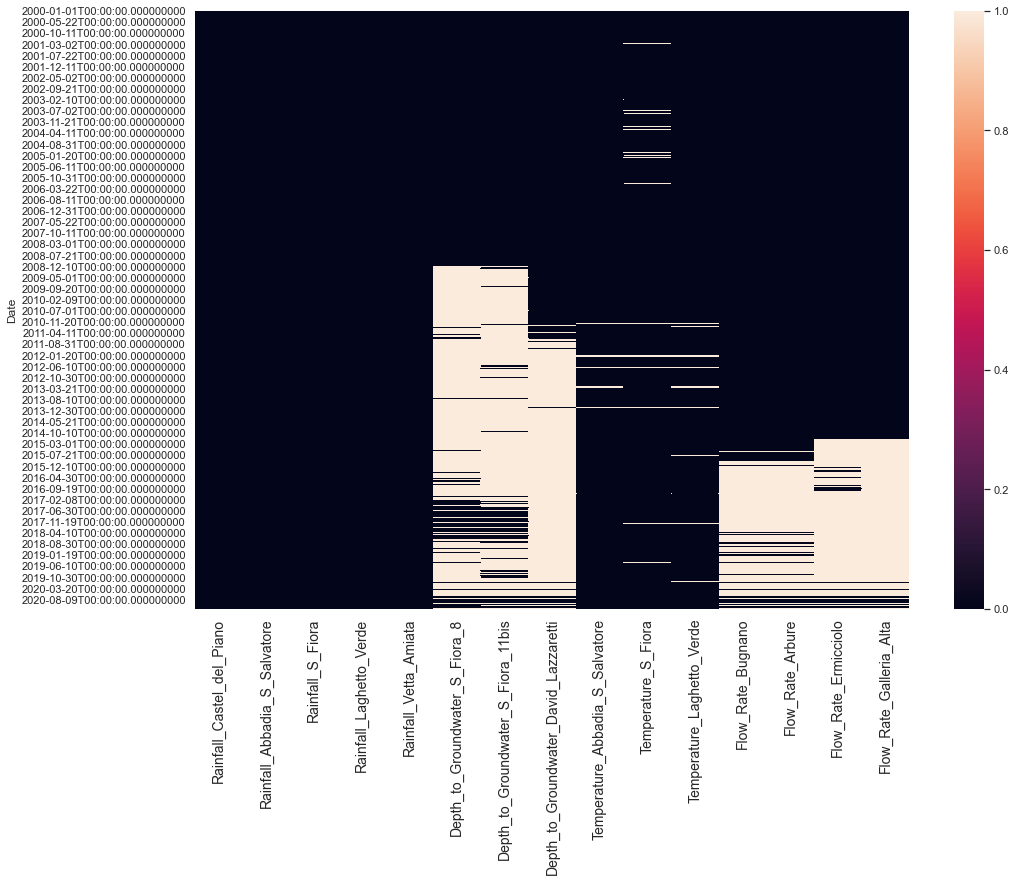

In [14]:
#Inspecting columns with negative values

coln = [col for col in df.columns if col not in ['year', 'month']]
fig, ax = plt.subplots(figsize= (16, 11))
sns.heatmap(df[coln] < 0)
plt.tick_params(axis='x', which='major', labelsize=14)

#display((df<0)/len(df))

---
 - Almost all the recorded _Flowrate_ values are negative.
 - Absolute values will be assumed for the feature values at feature engineering and modelling.
---

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">4. Feature Engineering ⚙️⚙️</p>

In [5]:
#Slice out years with predominantly null values between year 2000 to 2015
df = df[df['year']>2015]

#Interpolate to fill NaNs using the default method
for i in df.columns:
    df[i] = df[i].interpolate()

#Drop any possible remaining rows with NaNs
df = df.dropna()

In [6]:
#Defining the dataframe with the different output variables
df1 = df[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Arbure']]
df2 = df[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano']]
df3 = df[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Ermicciolo']]
df4 = df[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata',
       'Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',
       'Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde', 'Flow_Rate_Galleria_Alta']]

In [7]:
#Check if null values still exist
df.sort_index().isnull().any()

Rainfall_Castel_del_Piano                False
Rainfall_Abbadia_S_Salvatore             False
Rainfall_S_Fiora                         False
Rainfall_Laghetto_Verde                  False
Rainfall_Vetta_Amiata                    False
Depth_to_Groundwater_S_Fiora_8           False
Depth_to_Groundwater_S_Fiora_11bis       False
Depth_to_Groundwater_David_Lazzaretti    False
Temperature_Abbadia_S_Salvatore          False
Temperature_S_Fiora                      False
Temperature_Laghetto_Verde               False
Flow_Rate_Bugnano                        False
Flow_Rate_Arbure                         False
Flow_Rate_Ermicciolo                     False
Flow_Rate_Galleria_Alta                  False
year                                     False
month                                    False
dtype: bool

<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">5. Modelling 🧩</p>

In [18]:
# Split the dataset into the response, y, and features, X for the first output
y = df1['Flow_Rate_Arbure']
X = df1.drop('Flow_Rate_Arbure', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
pred_forest = forest.predict(X_test)

In [20]:
# Evaluating R^2 and RMSE values
MSE = mean_squared_error(pred_forest, y_test)
R2 = r2_score(pred_forest, y_test)
MSE

0.016894580855555643

* Checking the readiness of the dataset for modelling using the Random Forest Regressor model.
* A visual of the prediction result of the test size is also imposed on the test size in the following line chart.

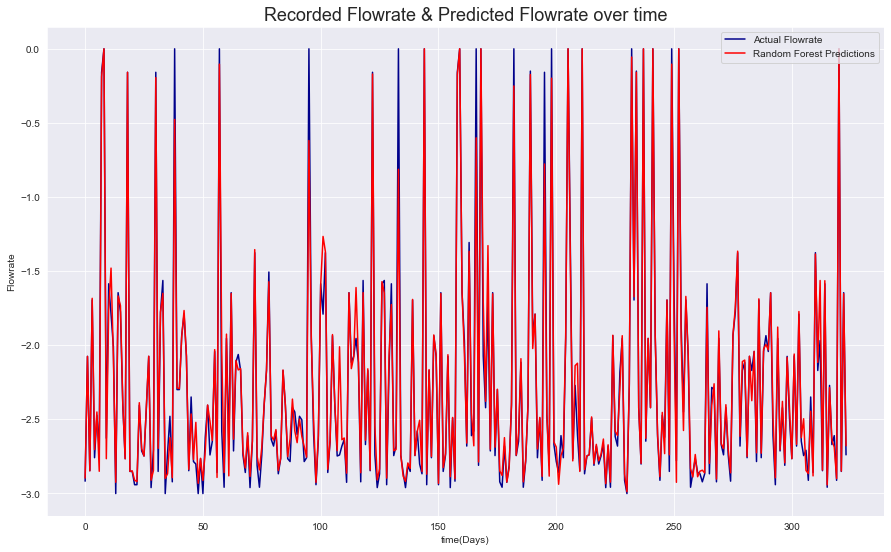

In [23]:
#Creating a plot that compares actual y_val with AdaBoost Predicted values
fig = plt.figure(figsize =(15, 9))
plt.plot(np.arange(len(y_test)), y_test, color='darkblue', label = 'Actual Flowrate')
plt.plot(np.arange(len(y_test)), pred_forest, color="red", label = 'Random Forest Predictions')
plt.title("Recorded Flowrate & Predicted Flowrate over time", fontsize=18)

plt.xlabel("time(Days)")
plt.ylabel("Flowrate")
plt.legend(loc='upper right')
plt.show()

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,Train Time
Regressor,,,,
Linear Regression,0.426604,0.278444,0.527678,0.002299
Decision Tree Regressor,0.956070,0.021333,0.146057,0.008689
Support Vector Regressor,0.130986,0.421997,0.649613,0.083279
XG Regressor,0.961164,0.018859,0.137328,0.217918
AdaBoost,0.734947,0.128711,0.358763,0.032171
Random Forest Regressor,0.965012,0.016990,0.130348,0.460608


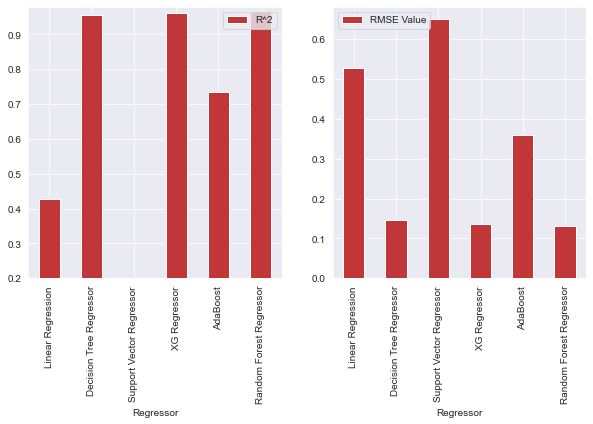

In [24]:
names = ['Linear Regression', 'Decision Tree Regressor', 
         'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [
    LinearRegression(), 
    DecisionTreeRegressor(),
    SVR(), 
    xg.XGBRegressor(),    
    AdaBoostRegressor(), 
    RandomForestRegressor()]

# Split the dataset into the response, y, and features, X for the first output
y1 = df1['Flow_Rate_Arbure']
X1 = df1.drop('Flow_Rate_Arbure', axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results1 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train1, y_train1)
    
    print ('... predicting')
    y_pred1 = clf.predict(X_train1)   
    pred_test1 = clf.predict(X_test1)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_1 = r2_score(y_test1, pred_test1)
    MSE_1 = mean_squared_error(y_test1, pred_test1)
    RMSE_1 = np.sqrt(mean_squared_error(y_test1, pred_test1))   
    
    # Save the results to dictionaries
    models[name] = clf
    
    results1.append([name, R2_1, MSE_1, RMSE_1, run_time.best])

    
results1_df = pd.DataFrame(results1, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'Train Time'])
results1_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results1_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results1_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results1_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

* The first chart comparing R^2 values of the different models in combination with the RMSE values in the second chart tips the following models for further assessment, namely; ```Decision Tree model```, ```Random Forest model```, and the ```XG Boost model```.
* The R^2 values shows the percentage/ratio of the variability in the dependent variable that is explained by the model, while the RMSE indicates the error on each data point predicted.

* The following will be a residual plot chart that allows a further assessment.

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,Train Time
Regressor,,,,
Linear Regression,0.378415,0.005199,0.072107,0.001593
Decision Tree Regressor,0.856221,0.001203,0.034680,0.006930
Support Vector Regressor,0.250226,0.006272,0.079194,0.016528
XG Regressor,0.889454,0.000925,0.030409,0.179451
AdaBoost,0.755723,0.002043,0.045203,0.035812
Random Forest Regressor,0.904759,0.000797,0.028225,0.515126


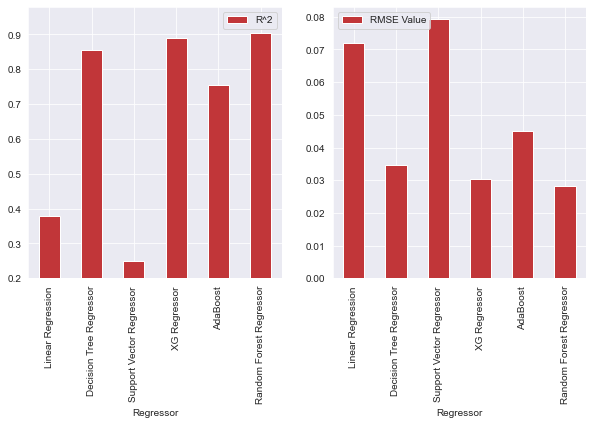

In [25]:
# Split the dataset into the response, y, and features, X for the second output
y2 = df2['Flow_Rate_Bugnano']
X2 = df2.drop('Flow_Rate_Bugnano', axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results2 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train2, y_train2)
    
    print ('... predicting')
    y_pred2 = clf.predict(X_train2)   
    pred_test2 = clf.predict(X_test2)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_2 = r2_score(y_test2, pred_test2)
    MSE_2 = mean_squared_error(y_test2, pred_test2)
    RMSE_2 = np.sqrt(mean_squared_error(y_test2, pred_test2))   
    
    # Save the results to dictionaries
    models[name] = clf
    
    results2.append([name, R2_2, MSE_2, RMSE_2, run_time.best])

    
results2_df = pd.DataFrame(results2, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'Train Time'])
results2_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results2_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results2_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results2_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,Train Time
Regressor,,,,
Linear Regression,0.148925,1.659871,1.288360,0.001704
Decision Tree Regressor,0.733362,0.520030,0.721131,0.006571
Support Vector Regressor,-0.097469,2.140418,1.463017,0.100305
XG Regressor,0.806604,0.377185,0.614154,0.179797
AdaBoost,0.740486,0.506136,0.711432,0.034988
Random Forest Regressor,0.852142,0.288371,0.537002,0.415915


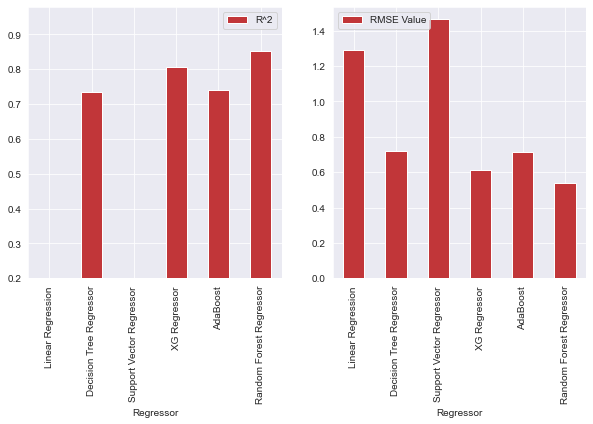

In [26]:
# Split the dataset into the response, y, and features, X for the third output
y3 = df3['Flow_Rate_Ermicciolo']
X3 = df3.drop('Flow_Rate_Ermicciolo', axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results3 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train3, y_train3)
    
    print ('... predicting')
    y_pred3 = clf.predict(X_train3)   
    pred_test3 = clf.predict(X_test3)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_3 = r2_score(y_test3, pred_test3)
    MSE_3 = mean_squared_error(y_test3, pred_test3)
    RMSE_3 = np.sqrt(mean_squared_error(y_test3, pred_test3))   
    
    # Save the results to dictionaries
    models[name] = clf
    
    results3.append([name, R2_3, MSE_3, RMSE_3, run_time.best])

    
results3_df = pd.DataFrame(results3, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'Train Time'])
results3_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results3_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results3_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results3_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE Value,Train Time
Regressor,,,,
Linear Regression,0.749119,0.625182,0.790684,0.001466
Decision Tree Regressor,0.822646,0.441956,0.664798,0.006601
Support Vector Regressor,0.526619,1.179638,1.086111,0.081031
XG Regressor,0.865205,0.335902,0.579570,0.167303
AdaBoost,0.789729,0.523983,0.723867,0.056018
Random Forest Regressor,0.889850,0.274487,0.523915,0.451559


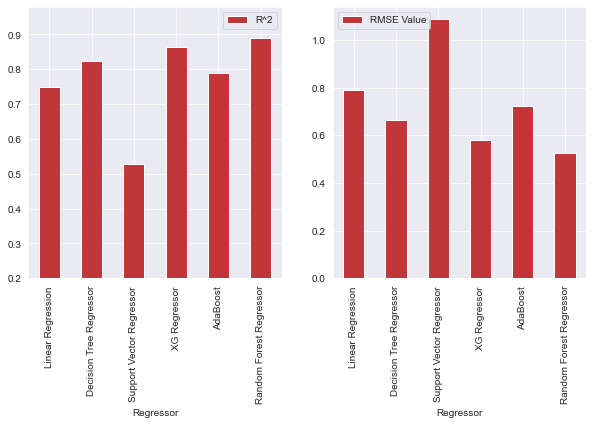

In [27]:
# Split the dataset into the response, y, and features, X for the fourth output
y4 = df4['Flow_Rate_Galleria_Alta']
X4 = df4.drop('Flow_Rate_Galleria_Alta', axis=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), xg.XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results4 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train4, y_train4)
    
    print ('... predicting')
    y_pred4 = clf.predict(X_train4)   
    pred_test4 = clf.predict(X_test4)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_4 = r2_score(y_test4, pred_test4)
    MSE_4 = mean_squared_error(y_test4, pred_test4)
    RMSE_4 = np.sqrt(mean_squared_error(y_test4, pred_test4))   
    
    # Save the results to dictionaries
    models[name] = clf
    
    results4.append([name, R2_4, MSE_4, RMSE_4, run_time.best])

    
results4_df = pd.DataFrame(results4, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE Value', 'Train Time'])
results4_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results4_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results4_df.plot(y=['R^2'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.2,0.98])
results4_df.plot(y='RMSE Value', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

* Although the Random Forest model trains with the highest duration, it gives the best result based on the observed R^2 values and the RMSE of all the outputs tested.

* Further statistical analysis will be carried out using the statsmodel library.

* Then hyperparameter tuning to follow.

In [ ]:
#Statistical analysis using statsmodel


<a id='1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:left">5. Hyperparameter Tuning 🔩</p>

### References

* [3 Best metrics to evaluate Regression Model? from Towards Data Science](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b)